# Estimation of obesity levels based on eating habits and physical condition

In [1]:
# IMPORTING DEPENDENCIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Uploading datasets
data=pd.read_csv(r"C:\Users\paras\Downloads\ObesityDataSet_raw_and_data_sinthetic (2)\ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
# data  information
data.info

<bound method DataFrame.info of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FA

In [4]:
# Calculate BMI and add it as a new column
data["BMI"] = data["Weight"] / ((data["Height"]) ** 2)

In [5]:
data.shape

(2111, 18)

In [6]:
# displaying first 5 rows
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [7]:
# Calculating and analyzing statistical data in the dataset
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


In [8]:
# Checking null values in dataframe
data.isnull()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data = data.dropna()

In [10]:
data.shape

(2111, 18)

In [11]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

In [12]:
#Check how many duplicate rows there are
dup_data = data[data.duplicated()]
print("Duplicate Data: ",dup_data.shape)

#Drop duplicates
data = data.drop_duplicates(keep='last')
data.shape

Duplicate Data:  (24, 18)


(2087, 18)

# Data Analysis

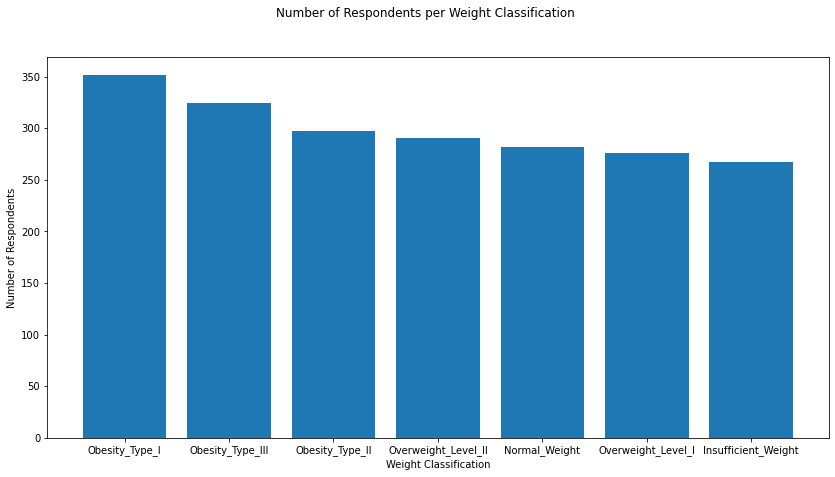

In [13]:
# Weight Classification
fig = plt.figure(figsize = (14, 7))
fig.suptitle("Number of Respondents per Weight Classification")
counts = data["NObeyesdad"].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel("Weight Classification")
plt.ylabel("Number of Respondents")
plt.show()

C:\Users\paras\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\paras\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


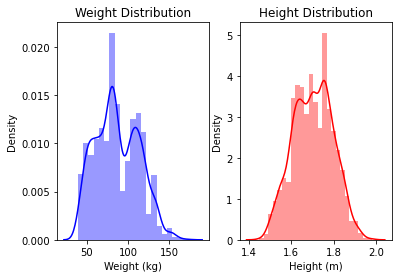

In [14]:
#Weight distributon suplot
plt.subplot(1,2, 1)
sns.distplot(data["Weight"], color="b").set_title('Weight Distribution')
plt.xlabel("Weight (kg)")
#Height distribution subplot
plt.subplot( 1,2, 2)
sns.distplot(data["Height"], color="r").set_title('Height Distribution')
plt.xlabel("Height (m)")
plt.show()

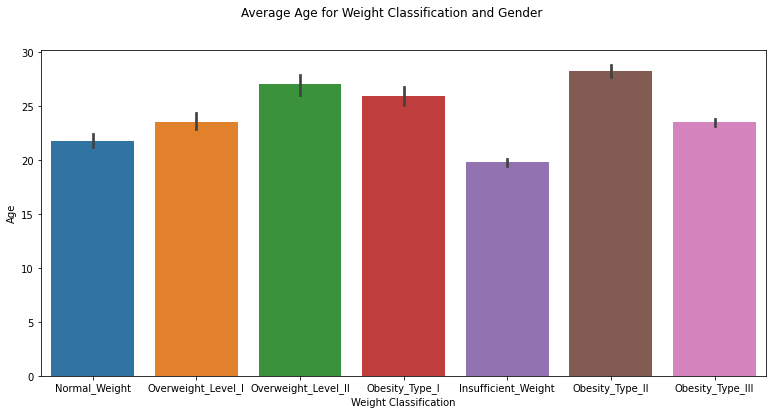

In [15]:
# Weight classification according to Age
fig = plt.figure(figsize = (13, 6))
fig.suptitle("Average Age for Weight Classification and Gender")
# order=["Insufficient Weight", "Normal Weight", "Level I Overweight", "Level II Overweight","Type I Obesity", "Type II Obesity", "Type III Obesity"]
sns.barplot(x=data["NObeyesdad"],y=data["Age"])
plt.xlabel("Weight Classification")
plt.ylabel("Age")
plt.show()

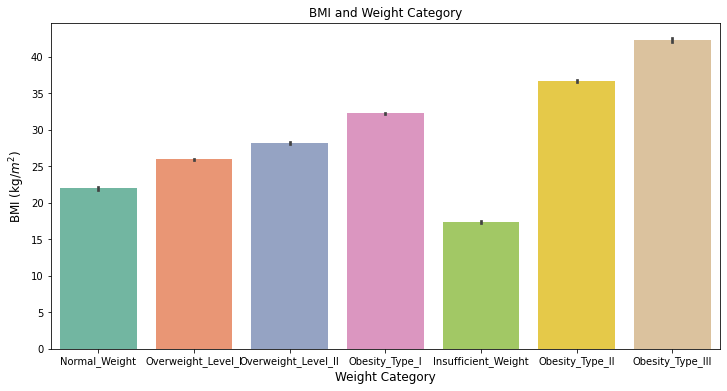

In [16]:
# Classification of Weights Category according to BMI
plt.figure(figsize=(12,6))
sns.barplot(x = data['NObeyesdad'], y =data['BMI'], palette = "Set2").set_title('BMI and Weight Category')
plt.ylabel("BMI (kg/$m^2$)", size=12)
plt.xlabel("Weight Category", size=12)
plt.show()


Text(0, 0.5, 'BMI (kg/m^2)')

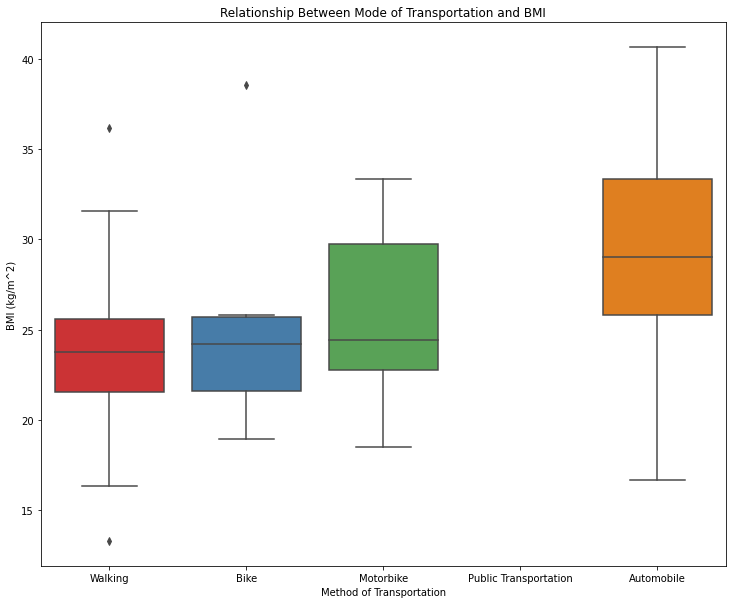

In [17]:
# Relationship between Mode of transportation and BMI
plt.figure(figsize=(27,22))
plt.subplot(2, 2, 2)
sns.boxplot(x = data['MTRANS'], y = data['BMI'], data = data, order=["Walking","Bike","Motorbike","Public Transportation", "Automobile"], palette = "Set1").set_title('Relationship Between Mode of Transportation and BMI')
plt.xlabel("Method of Transportation")
plt.ylabel("BMI (kg/m^2)")

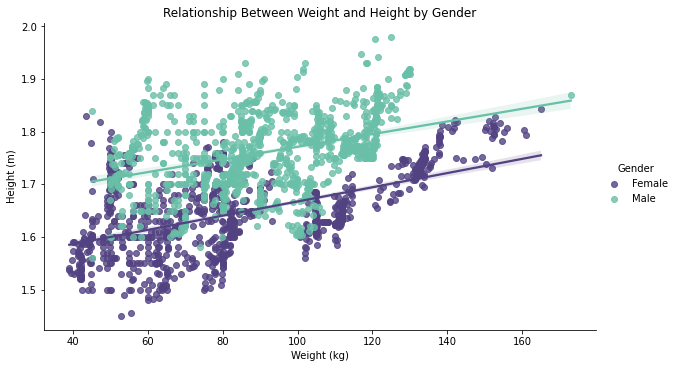

In [18]:
# Relationship Between Weight and Height by Gender
sns.lmplot(x="Weight", y="Height", hue="Gender", data=data,  
          palette=dict(Female="#524282", Male="#69bfa7"), height=5, aspect=1.7, x_jitter=.1)
plt.title('Relationship Between Weight and Height by Gender')
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.show()

In [19]:
# Converting categorical data into numerical data
le = LabelEncoder()

# apply Label Encoding to the categorical columns
categorical = ['Gender', 'family_history_with_overweight','SMOKE', 'FAVC', 'NCP','CAEC','SCC','CALC','MTRANS','NObeyesdad']
# le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [20]:
data.shape

(2087, 18)

In [21]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,477,2,0,2.0,0,0.0,1.0,3,3,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,477,2,1,3.0,1,3.0,0.0,2,3,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,477,2,0,2.0,0,2.0,1.0,1,3,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,477,2,0,2.0,0,2.0,0.0,1,4,5,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,0,2,0,2.0,0,0.0,0.0,2,3,6,28.342381


In [22]:
# Correlation Matrix
coerr_mat=data.corr()
coerr_mat

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
Gender,1.000000,0.050641,0.626748,0.163176,0.113492,0.061220,-0.271575,0.057830,0.074564,0.045501,0.095129,-0.102435,0.189471,0.022356,0.010574,-0.139044,0.014699,-0.054737
Age,0.050641,1.000000,-0.031748,0.198160,0.200379,0.063895,0.013572,-0.052523,0.092097,0.091261,-0.044058,-0.117959,-0.148202,-0.302927,-0.045565,-0.601476,0.238308,0.240769
Height,0.626748,-0.031748,1.000000,0.457468,0.232258,0.180694,-0.040363,0.219063,0.058001,0.054326,0.220487,-0.137078,0.293584,0.041808,-0.135756,-0.068258,0.038700,0.124466
Weight,0.163176,0.198160,0.457468,1.000000,0.492969,0.274655,0.216574,0.118804,0.300271,0.024369,0.203823,-0.205409,-0.056490,-0.079351,-0.211351,0.009836,0.388802,0.934494
family_history_with_overweight,0.113492,0.200379,0.232258,0.492969,1.000000,0.214329,0.033199,0.037901,0.207738,0.014885,0.168627,-0.193947,-0.062937,0.002314,0.028403,-0.092730,0.330391,0.483648
FAVC,0.061220,0.063895,0.180694,0.274655,0.214329,1.000000,-0.025419,-0.005305,0.147921,-0.050713,0.002993,-0.191277,-0.111184,0.071505,-0.087661,-0.069422,0.041023,0.247368
FCVC,-0.271575,0.013572,-0.040363,0.216574,0.033199,-0.025419,1.000000,0.046963,-0.038565,0.013716,0.081332,0.071179,0.022003,-0.104128,-0.063132,0.069012,0.025728,0.265082
NCP,0.057830,-0.052523,0.219063,0.118804,0.037901,-0.005305,0.046963,1.000000,-0.066905,0.010187,0.082141,-0.024734,0.111059,0.019151,-0.103741,-0.032210,-0.086796,0.060495
CAEC,0.074564,0.092097,0.058001,0.300271,0.207738,0.147921,-0.038565,-0.066905,1.000000,-0.054960,0.114801,-0.109393,-0.034803,-0.036708,-0.039502,-0.058158,0.314510,0.322919
SMOKE,0.045501,0.091261,0.054326,0.024369,0.014885,-0.050713,0.013716,0.010187,-0.054960,1.000000,-0.031642,0.047384,0.010811,0.016491,-0.083181,-0.009995,-0.023341,-0.002022


<AxesSubplot:>

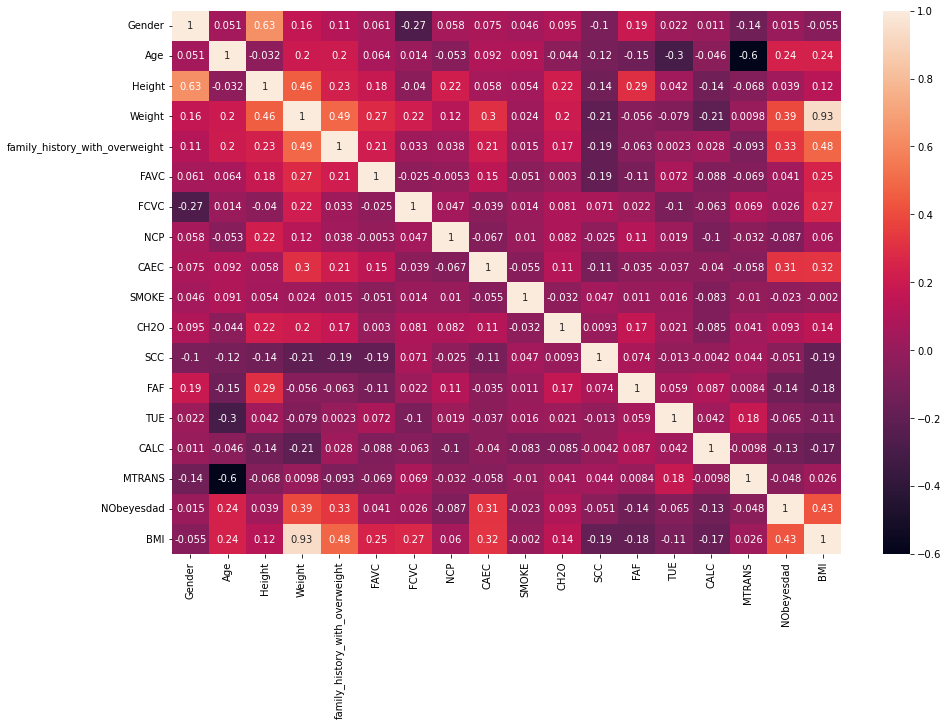

In [23]:
# visualize the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(coerr_mat, annot = True)

In [24]:
# Dropping Gender column because it is not used in model
data = data.drop(['Gender','Height','Weight'], axis = 1)
data.shape

(2087, 15)

In [25]:
data.head()

,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,21.0,1,0,2.0,477,2,0,2.0,0,0.0,1.0,3,3,1,24.386526
1,21.0,1,0,3.0,477,2,1,3.0,1,3.0,0.0,2,3,1,24.238227
2,23.0,1,0,2.0,477,2,0,2.0,0,2.0,1.0,1,3,1,23.765432
3,27.0,0,0,3.0,477,2,0,2.0,0,2.0,0.0,1,4,5,26.851852
4,22.0,0,0,2.0,0,2,0,2.0,0,0.0,0.0,2,3,6,28.342381


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be normalized
cols_to_normalize = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','BMI']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

# Print the normalized dataset
data.head()

,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0.148936,1,0,0.5,0.752366,2,0,0.5,0,0.000000,0.5,3,3,1,0.301162
1,0.148936,1,0,1.0,0.752366,2,1,1.0,1,1.000000,0.0,2,3,1,0.297240
2,0.191489,1,0,0.5,0.752366,2,0,0.5,0,0.666667,0.5,1,3,1,0.284736
3,0.276596,0,0,1.0,0.752366,2,0,0.5,0,0.666667,0.0,1,4,5,0.366359
4,0.170213,0,0,0.5,0.000000,2,0,0.5,0,0.000000,0.0,2,3,6,0.405778


In [27]:
# testing and splitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [28]:
# Split the dataset into features and target variable
X = data.drop('NObeyesdad', axis=1)
Y = data['NObeyesdad']

In [29]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
X_train.shape, X_test.shape

((1669, 14), (418, 14))

# LOGISTIC REGRESSION

In [31]:
# logreg = LogisticRegression(random_state=42)
# logreg.fit(X_train, Y_train)

# # Make predictions on the testing data
# Y_pred = logreg.predict(X_test)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(Y_test, Y_pred)
# print("Accuracy before hyperparameter tuning: {:.2f}%".format(accuracy * 100))


In [31]:
logreg = LogisticRegression(random_state=42)

# Define the hyperparameters to tune
hyperparameters = {'penalty': ['l1', 'l2', 'elasticnet'],
                   'C': [0.001, 0.01, 0.1, 1, 10, 100],
                   'solver': [ 'liblinear', 'sag', 'saga']}

# Define the GridSearchCV object
grid_search = GridSearchCV(logreg, hyperparameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best Training accuracy score:", grid_search.best_score_)

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model on the test data
logreg_test = accuracy_score(Y_test, Y_pred)
print("Testing Accuracy: {:.2f}%".format(logreg_test * 100))

C:\Users\paras\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\paras\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\paras\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\paras\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\paras\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\paras\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\paras\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\paras\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\paras\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\paras\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with 

Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
Best Training accuracy score: 0.843040046034058
Testing Accuracy: 88.04%


C:\Users\paras\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# DECISION TREE


In [32]:

# Define the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search with cross-validation to find the best hyperparameters
dt_grid = GridSearchCV(dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, Y_train)

# Print the best hyperparameters and their accuracy score
print("Best hyperparameters: ", dt_grid.best_params_)
print("Traing accuracy score: {:.2f}%".format(dt_grid.best_score_ * 100))
# Predict on the testing data
# Y_pred = dt.predict(X_test)
best_model = dt_grid.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model on the test data
dt_test = accuracy_score(Y_test, Y_pred)
print("Testing Accuracy: {:.2f}%".format(dt_test * 100))

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score: 97.12%
Testing Accuracy: 97.85%


# RANDOM FOREST

In [35]:
# Define the Random Forest classifier
rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Define the grid search with 5-fold cross validation
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search_rfc.fit(X_train, Y_train)

# Print the best parameters and accuracy score
print("Best parameters:", grid_search_rfc.best_params_)
print("Training Accuracy: {:.2f}%".format(grid_search_rfc.best_score_ * 100))

# Testing Data

best_model = grid_search_rfc.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model on the test data
rfc_test = accuracy_score(Y_test, Y_pred)
print("Testing Accuracy: {:.2f}%".format(rfc_test * 100))

Best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Training Accuracy: 97.72%
Testing Accuracy: 97.37%


# SUPPORT VIRTUAL MACHINE

In [34]:
# Define the SVM model
svm_model = SVC()

# Define the hyperparameter grid for SVM
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

# Apply GridSearchCV to find the best parameters
svm_cv = GridSearchCV(svm_model, param_grid, scoring='accuracy', cv=5)
svm_cv.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", svm_cv.best_params_)
print("Training Accuracy: {:.2f}%".format(svm_cv.best_score_ * 100))

# Train the model using the best hyperparameters
svm_model = SVC(C=svm_cv.best_params_['C'], gamma=svm_cv.best_params_['gamma'], kernel=svm_cv.best_params_['kernel'])
svm_model.fit(X_train, Y_train)

# Predict on the testing data
Y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
svm_test = accuracy_score(Y_test, Y_pred)
print("Testing Accuracy: {:.2f}%".format(svm_test * 100))

Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 93.35%
Accuracy: 94.50%


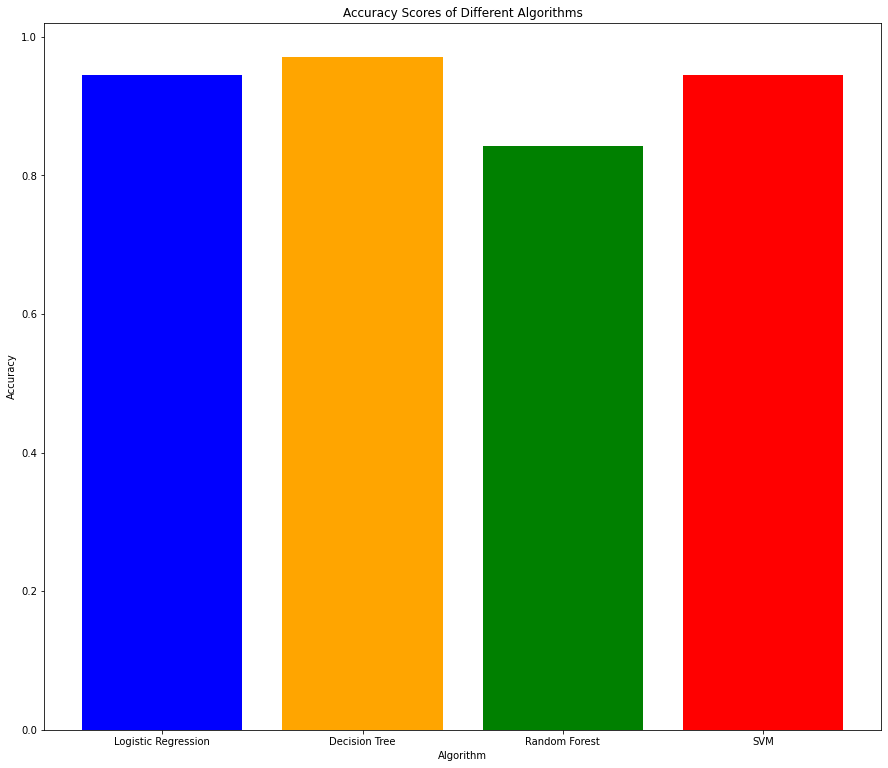

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 13))
# Create a list of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# Create a list of accuracy scores
scores = [grid_search.best_score_, dt_grid.best_score_, grid_search_rfc.best_score_, svm_cv.best_score_]

# Plot a bar chart
plt.bar(classifiers, scores, color=['blue', 'orange', 'green', 'red'])

# Add a title and axis labels
plt.title('Accuracy Scores of Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

# Show the plot
plt.show()


Conclusion
There was a significant improvement from the baseline accuracy of 54.57% to the Random Forest accuracy of 97.72%, which was achieved through the aggregation of different models and tuning various parameters, such as n_estimators, max_depth, and learning_rate. While the accuracy is high, the model is not substantially overfitted, as the cross-validation scores for each of the ensemble methods all differed from the model accuracy by less than 1%.

The feature importance calculations show us that age, family history, and height had the largest influence on the models above. Other factors that had a large influence on one of the above models were the consumption of food before meals, physical activity frequency, and the number of main meals. Factors that were not impactful across the board were smoking, calorie consumption monitoring, gender, and transportation. Given the model’s high accuracy, anyone interested in the factors that influence obesity for their own health reasons or other uses can refer to the aforementioned prominent features.

The best algorithm is Decision Tree with an accuracy score of 97.12%.


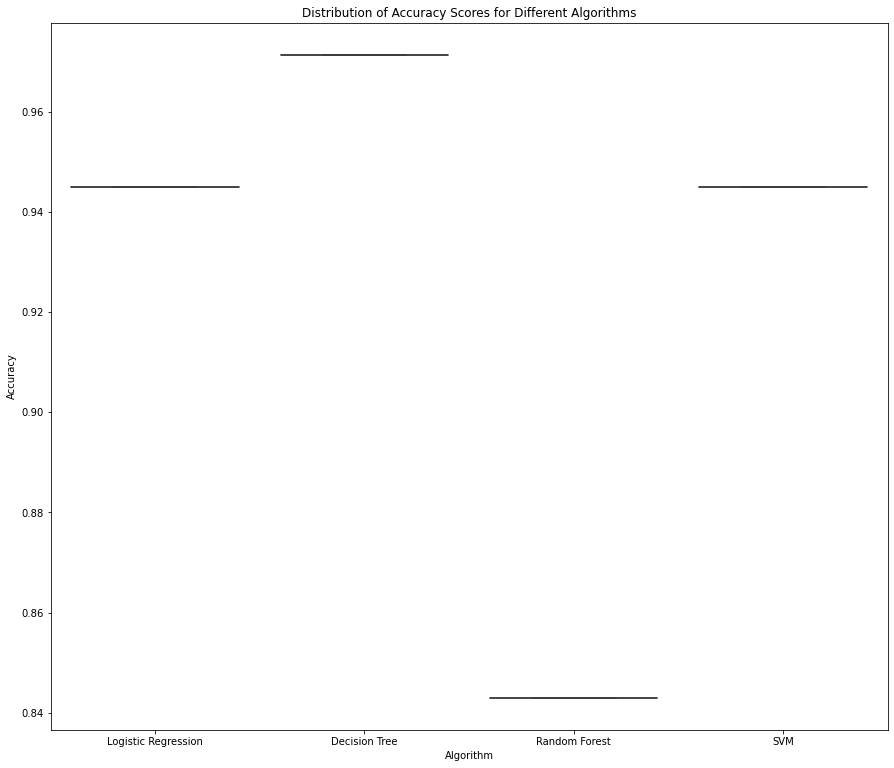

In [51]:
fig = plt.figure(figsize = (15, 13))

# Find the best algorithm and its accuracy score
best_score = max(scores)
best_index = scores.index(best_score)
best_algorithm = classifiers[best_index]

# Print the best algorithm and its accuracy score
print('The best algorithm is {} with an accuracy score of {:.2f}%.'.format(best_algorithm, best_score*100))

# Plot a boxplot of the accuracy scores for each algorithm
sns.boxplot(x=classifiers, y=scores)
plt.title('Distribution of Accuracy Scores for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()
